In [29]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import networkx as nx
import random


# Part 1:


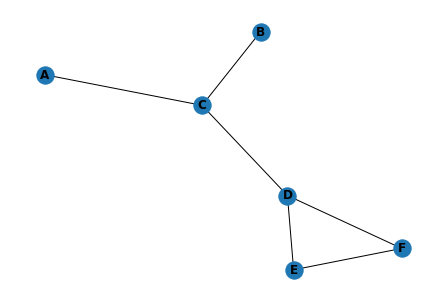

In [147]:
# with help from
# https://networkx.org/documentation/stable/tutorial.htm

G = nx.Graph()

# We create the network
G.add_nodes_from(['A','B','C','D','E','F'])
edgelist = [('A','C'),
            ('B','C'),
            ('C','D'),
            ('D','E'),
            ('D','F'),
            ('E','F')]

G.add_edges_from(edgelist)

nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

### a) Show the degree of each node and make a plot of its (normalized) degree distribution.

Degree of each node: [('A', 1), ('B', 1), ('C', 3), ('D', 3), ('E', 2), ('F', 2)]


Text(0, 0.5, 'Frequency')

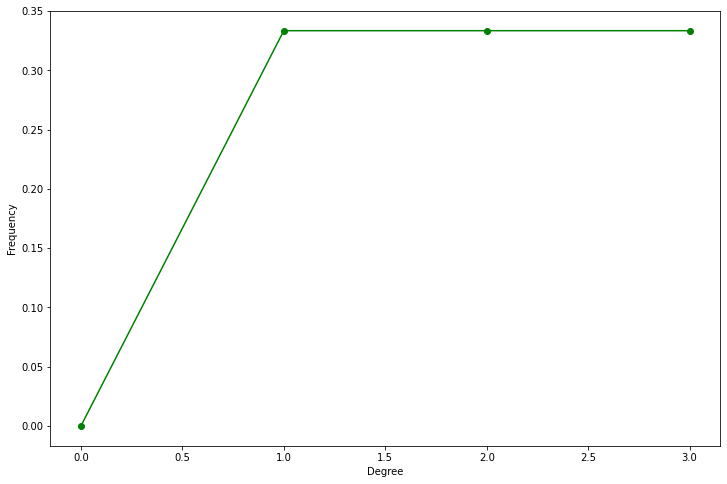

In [3]:
# as seen in
# https://networkx.org/documentation/stable/auto_examples/drawing/plot_degree.html

print(f"Degree of each node: {nx.degree(G)}")

degree_freq = nx.degree_histogram(G)
degree_norm = []
for i in degree_freq:
    degree_norm.append(i/sum(degree_freq))

degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8))
plt.plot(degrees, degree_norm,'go-')
plt.xlabel('Degree')
plt.ylabel('Frequency')

### b) Calculate the diameter and the average path length of the network

Since this is an undirected network, it should be straightfoward to enumerate the path lengths:

$$
(A,B) = 2\quad   (B,C) = 1 \quad   (C,D) = 1  \quad  (D,E) = 1  \quad  (E,F) = 1
$$
$$
(A,C) = 1 \quad   (B,D) = 2  \quad  (C,E) = 2  \quad  (D,F) = 1
$$
$$
(A,D) = 2  \quad  (B,E) = 3  \quad  (C,F) = 2
$$
$$
(A,E) = 3  \quad  (B,F) = 3
$$
$$
(A,F) = 3
$$

We can observe that the largest shortest path in this network (ie, the diameter) is 3. We should also note that this enumeration corresponds to half of the possible paths of the network, since the reverse connections (e.g (B,A) were not considered. The sum of the distances presented is 28, so we know that the sum of all possible shortest paths between nodes in this network is $28 * 2 = 56$

In [4]:
print(f"The diameter of this network is {nx.diameter(G)}")

The diameter of this network is 3


We can compute the previous distance Matrix for the network:

In [5]:
dist = dict(nx.all_pairs_shortest_path_length(G))

# sum of all shortest distances in the network:
res = 0
for item in dist:
    #print(dist[item])
    #print(dist[item].values())
    h = sum(dist[item].values())
    res += h

print(f"sum of all non-infinite distances:{res}")

sum of all non-infinite distances:56


The average path length is given by:

$\frac{1}{2*E_{max}}\sum_{i, i\neq j} h_i = \frac{1}{6*5} * 56 = \frac{56}{30} = 1.8(6)$

In [65]:
print(f"average shortest path length is {nx.average_shortest_path_length(G)}")

average shortest path length is 1.8666666666666667


### c) Calculate the **local clustering coefficient** of each node and the **average local clustering coefficient** of the entire network.

The local clustering coefficient of a given node *i* can be calculated with

$C_i = \frac{2e_i}{k_i (k_i-1)}$, with $e_i$ being the edges between the neighbours of node *i* and *k* being the degree of node *i*. For this network:

A: $E_A = 0, k_A = 1; C_A = \frac{0}{1*(1-1)} = 0$ (*)

B: $E_B = 0, k_B = 1; C_B = \frac{0}{1*(1-1)} = 0$ (*)

C: $E_C = 0, k_C = 3; C_C = \frac{0}{3*(3-1)} = 0$

D: $E_D = 1, k_D = 3; C_D = \frac{2}{3*(3-1)} = \frac{2}{6}$

E: $E_E = 1, k_E = 2; C_E = \frac{2}{2*(2-1)} = 1$

F: $E_F = 1, k_F = 2; C_F = \frac{2}{2*(2-1)} = 1$

(*) As a convention for nodes of degree 1; the algebric operation is actually undefined.

In [121]:
nx.clustering(G)

{'A': 0, 'B': 0, 'C': 0, 'D': 0.3333333333333333, 'E': 1.0, 'F': 1.0}

The **average local clustering coeeficient** is given by:

$C = \frac{1}{N} \sum_{i}^n C_i = \frac{0 + 0 + 0 + 0.3(3) + 1 + 1}{6} = \frac{2.3}{6}$

In [68]:
nx.average_clustering(G)

0.38888888888888884

### d) Calculate the (normalized) betweenness centrality and closeness centrality of each node.

The normalized betweeness centrality can be calculated by:

$C'_B (i) = \sum_{j<k} \frac{g_{jk}(i)}{g_{jk}}*\frac{1}{(n-1)(n-2)/2}$

where  $g_{jk}$ is the number of shortest paths connecting nodes *j* and *k* and $g_{jk}(i)$ is the number of paths that include node *i*.

To determine this, we will enumerate, for each node *i*, the number of shortest paths and the corresponding number of shortest paths that go through the node *i* in the following format:

$(node_j, node_k,): \{number of shortest paths that go through node_i, number of shortest paths\}$

Node A:

$(B,C): \{0,1\}\quad $

$(B,D): \{0,1\}\quad $

$(B,E): \{0,1\}\quad $

$(B,F): \{0,1\}\quad $

$(C,D): \{0,1\}\quad $

$(C,E): \{0,1\}\quad $

$(C,F): \{0,1\}\quad $

$(D,E): \{0,1\}\quad $

$(D,F): \{0,1\}\quad $

$(E,F): \{0,1\}\quad $
<br>
<br>
$C'_B (A) = 0$

Node B:

$(A,C): \{0,1\}\quad $

$(A,D): \{0,1\}\quad $

$(A,E): \{0,1\}\quad $

$(A,F): \{0,1\}\quad $

$(C,D): \{0,1\}\quad $

$(C,E): \{0,1\}\quad $

$(C,F): \{0,1\}\quad $

$(D,E): \{0,1\}\quad $

$(D,F): \{0,1\}\quad $

$(E,F): \{0,1\}\quad $
<br>
<br>
$C'_B (B) = 0\quad $

Node C:

$(A,B): \{1,1\}\quad $

$(A,D): \{1,1\}\quad $

$(A,E): \{1,1\}\quad $

$(A,F): \{1,1\}\quad $

$(B,D): \{1,1\}\quad $

$(B,E): \{1,1\}\quad $

$(B,F): \{1,1\}\quad $

$(D,E): \{0,1\}\quad $

$(D,F): \{0,1\}\quad $

$(E,F): \{0,1\}\quad $
<br>
<br>
$C'_B (C) = \frac{1+1+1+1+1+1+1}{(6-2)(6-1)/2} = \frac{7}{10} = 0.7$;

Node D:

$(A,B): \{0,1\}\quad $

$(A,C): \{0,1\}\quad $

$(A,E): \{1,1\}\quad $

$(A,F): \{1,1\}\quad $

$(B,C): \{0,1\}\quad $

$(B,E): \{1,1\}\quad $

$(B,F): \{1,1\}\quad $

$(C,E): \{1,1\}\quad $

$(C,F): \{1,1\}\quad $

$(E,F): \{0,1\}\quad $
<br>
<br>
$C'_B (D) = \frac{1+1+1+1+1+1}{(6-2)(6-1)/2} = \frac{6}{10} = 0.6$;

Node E:

$(A,B): \{0,1\}\quad $

$(A,C): \{0,1\}\quad $

$(A,D): \{0,1\}\quad $

$(A,F): \{0,1\}\quad $

$(B,C): \{0,1\}\quad $

$(B,D): \{0,1\}\quad $

$(B,F): \{0,1\}\quad $

$(C,D): \{0,1\}\quad $

$(C,F): \{0,1\}\quad $

$(D,F): \{0,1\}\quad $
<br>
<br>
$C'_B (E) = 0$;

Node F:

$(A,B): \{0,1\}\quad $

$(A,C): \{0,1\}\quad $

$(A,D): \{0,1\}\quad $

$(A,E): \{0,1\}\quad $

$(B,C): \{0,1\}\quad $

$(B,D): \{0,1\}\quad $

$(B,E): \{0,1\}\quad $

$(C,D): \{0,1\}\quad $

$(C,E): \{0,1\}\quad $

$(D,E): \{0,1\}\quad $
<br>
<br>
$C'_B (F) = 0$;



The normalized closeness centrality of each node can be calculated as:

$C'_c(i) = \frac{n-1}{\sum_{j=1}^{n}d_{i,j}}$

for this purpose, we can recall the distance matrix we have computed previously:

In [120]:
print(dist)

{'A': {'A': 0, 'C': 1, 'B': 2, 'D': 2, 'E': 3, 'F': 3}, 'B': {'B': 0, 'C': 1, 'D': 2, 'A': 2, 'E': 3, 'F': 3}, 'C': {'C': 0, 'B': 1, 'D': 1, 'A': 1, 'E': 2, 'F': 2}, 'D': {'D': 0, 'E': 1, 'C': 1, 'F': 1, 'B': 2, 'A': 2}, 'E': {'E': 0, 'D': 1, 'F': 1, 'C': 2, 'B': 3, 'A': 3}, 'F': {'F': 0, 'E': 1, 'D': 1, 'C': 2, 'B': 3, 'A': 3}}


Therefore, the normalized closeness centrality of each node is:

$C'_c(A) = \frac{6-1}{0+2+1+2+3+3} = \frac{5}{11}$;

$C'_c(B) = \frac{6-1}{2+0+1+2+3+3} = \frac{5}{11}$;

$C'_c(C) = \frac{6-1}{1+1+0+1+2+2} = \frac{5}{7}$;

$C'_c(D) = \frac{6-1}{2+2+1+0+1+1} = \frac{5}{7}$;

$C'_c(E) = \frac{6-1}{3+3+2+1+0+1} = \frac{5}{10}$;

$C'_c(F) = \frac{6-1}{3+3+2+1+1+0} = \frac{5}{10}$;

## 2. Another possible clustering metric is the global clustering coefficient (also known as transitivity) which can be defined as in the following way:
# Cglobal = 3 × triangles / number of triplets
# A Triplet (or triad) are 3 nodes that are connected by either 2 (open triplet) or 3 (closed triplet) links. A triangle graph therefore includes three closed triplets, one centered on each of the nodes. Which network clustering metric (global or average cluster coefficient) gives more weight to high degree nodes? Why?

Conceptually, it can be assumed that average cluster coefficient, being calculated as an average of the local cluster coefficient:

$C_i = \frac{2e_i}{k_i (k_i-1)}$

penalizes nodes for having a high degree, by having the value of the coefficient metric being inversely proportional to the power of 2 of the degree (more precisely, $k^2-k$). Empirically, on nodes with a high degree it is placed more of a burden of having its neighbours connected among themselves in order to score high on this particular metric. In that sense, for example, a node with a high degree in a central position, such as in a star configuration with several degree-1 nodes attached to it will score very low on the local cluster coefficient metric and contribute negatively to the average cluster coefficient. Conversely, the same node would be less penalized on the transitivity coefficient since its high degree would not be directly taken into account in this metric. As long as its neighbours were reasonably interconnected among themselves, nodes with high degrees can contribute without penalizing the global clustering coeficcient. In this sense, transitivity gives more weight to the high degree nodes.




## 3 - Using *Gephi*:

### (a) What is the number of airports and flights in the network?

On the context tab, *Gephi* displays the information of the amount of nodes (3147) and edges (66679). For this particular network, each airport corresponds to a single node (so, 3147 in total) and each flight corresponds to an edge, since the data was imported with no merging of edges. Therefore, the number of flights represented in this data is 66679.

### (b) On average, an airport has how many outgoing flights? And to how many different airports?

This question is better approached by considering the merging strategy when loading the network. If no merging of edges is performed then the average degree will represent the average number of outgoing flights per airport (as well as the incoming, since this is a global average, avg in = avg out). In the statistics panel we can compute this value, which for this dataset equals 21.188. If at the time of data import we choose to merge edges by summing then each edge will represent a different airport connection, with the weight of the edge representing the number of flights. In this case, the unweighted average degree will give us the average number of airports that each airport can connect via flight to, which comes down to 11.699.

### (c) What is the diameter and average path length of the network?

These calculations can be performed in the statistics panel, in the edge overview section. The Graph Distance Report that is produced indicates us that the diameter of this network is 13 and the average path length is 3.9688665034015584. As someone who really dislikes airports, the notion that in average it would take less than 4 flight changes to reach any point in the world is somewhat reassuring.

### (d) What is the pair of airports with more flights between each other (and how many flights)?

If the network is created by summing the edges during data import, then the weight of each edge will represent the number of flights between each airport. If we compute the average degree in the statistics panel, this operation will append node degree and edge weight computations to the raw data that can be examined in the Data Laboratory pane. Sorting the edges by edge weight in the data laboratory reveals that the pair of nodes [3830, 3862]. 3830 -> 3862 has a weight of 20 and 3862 has a weight of 19. For reference, the third-highest weight in this network is 13. Inspecting the node list reveals that the node 3830 represents the Chicago O'Hare International Airport and the node 3862 corresponds to the Portland International Jetport Airport, both. in the USA

### (e) List the top-3 of the airports that have flights to the highest number of other airports.

The answer for this question corresponds to the top 3 nodes with the highest outdegree, in a network created with weighted edges (so number of edges = number of airport connections). After calculating the average degree in the statistical panel so individual degree computations are performed, we can sort the node data in the Data Laboratory to obtain the answer. The top 3 airports are Frankfurt am Main (id: 340, outdegree: 239), Charles de Gaulle International Airport (Paris, id: 1382, outdegree: 237) and Amsterdam Airport Schiphol (id: 580, outdegree: 232).

### (f) List the top-3 of the airports with highest normalized betweenness centrality.

This question is better answered with a network without weighted edges so weights are not taken in account for distance calculations in *Gephi*. In order to access the computations for betweenness centrality of each node we must perform the average path length calculation in the statistics panel, taking care in specifying that centralities should be normalized to [0,1]. After this step, betweeness centrality can be views in the Node table on the Data Laboratory (in my case display of this variable had to be toggled due to the limit of shown variables being reached). The top 3 airports with the highest normalized betweenness centrality (B.C.) are Los Angeles International Airport(id: 3484, B.C.: 0.08518), Charles de Gaulle International Airport (Paris, id: 1382, B.C.: 0.071947),  and London Heathrow Airport (id: 507, B.C.: 0.061904).

### (g) Consider Ted Stevens Anchorage International Airport. What is its global ranking in terms of betweenness centrality and out-degree? Can you explain the discrepancy? Indicate another airport with the same kind of behavior (high betweenness centrality but relatively low out-degree).

Through a filter in the Data Laboratory Node pane we can determine Ted Stevens Anchorage International Airport (TSAIA) to have id = 3774. Computations for betweenness centrality and out degree are already in place after performing the steps to answer questions **e)** and **f)**. A little CTRL+A/CTRL+C/CTRL+V action on an excel spreadsheet was then employed to determine the global rankings of betweenness centrality (8th) and outdegree (272nd, tied with Murtala Muhammed International Airport, Lagos and Jeju International Airport, Cheju, with an outdegree of 59). This combination suggests that even though TSAIA connects directly to relatively few airports directly, its placement in the network makes it an important component of a larger number of connections. TSAIA's geographical location supports this theory, being located in Alaska, in the Northwestern corner of the North American Continent, physically distant of other airports in a remote location. This would make TSAIA a very important hub/scale point of flights connecting the Eastern Asia airports and the North American continent. If this hypothesis is correct, then we can expect airports in a similar position to have similar rankings. Some examples can be Lajes (Azores, Portugal, id: 1629, outdegree rank: 895, B.C. rank: 379) and Keflavik (Iceland, outdegree rank: 336, B.C. rank: 116). Both these airports display a role as a hub or chokepoint through which the shortest path between important airports go through, a role that is more significant than the ammount of airports they directly connect to.

### (h) List the top-3 of countries with the highest number of airports.

This question can be incidentally answered by performing a filter operation; In the Filter panel, choosing a Filter -> Attributes -> Partition and selecting the desired attribute (in out case, 'Countries'). The selection boxes used to apply the filter to the network overview include the percentage of nodes on each partition. The top 3 countries are, therefore, USA (16.68% of airports), Canada (6.48%) and China (5.5%).

### (i) List the top-3 of airlines with the highest number of flights. (info about airline codes)

With the same steps used to answer question **h)** we can select 'airline' as a partition. This yields the following top 3: FR (Ryanair - 3.73%), AA (American Airlines - 3.53%) and UA (United Airlines - 3.26%). The airlines were identified by searching the IATA code in the https://openflights.org/html/alsearch .

### (j) What is the number of domestic flights inside USA ?

This question must be answered based on a network with unweighted edges, so 1 edge = 1 flight. Applying the filter with the steps mentioned in **h)** and filtering specific to USA, we see the network becomes restricted to 10487 edges (flights) connecting 525 nodes (airports). The answer to this question is therefore 10487.

### (k) How many airports in China fly to at least 50 other airports?

Since this question concerns airport connections regardless of the number of airlines operating, answering will require a filter applied on a network with weighted edges. After applying the filter (Attributes - Partition - countries and selecting 'China') we can switch to the Data Laboratory and sort the data by outdegree in descending order. It is easy then to observe that there are 21 airports in China with flights to at least 50 other airports.

### (l) How many flights are there between Brazil and Portugal?

This question requires each flight to have its own edge, so the unweighted version of the network will be used. A filter by Attributes -> IntraEdges -> Countries can be used to restrict the network to edges between nodes with 'Brazil' and 'Portugal' as the value in the 'Country' Atribute'. This restriction results in 24 visible edges, which correspond to the existant flights between Brazil and Portugal.

### (m) Consider a network formed only by Ryanair flights. What is the number of nodes and edges of its giant component? Considering only this giant component, what is the most important airport in terms of closeness centrality?

As seen previously on **i)**, the IATA code for this airline is 'FR'. On a unweighted network we can apply a filter for Attributes -> partition (airline = FR) and nest within it a second filter for Topology -> Giant component, which will restrict the network to 176 nodes and 2484 edges. We can recalculate centrality statistics for this subset of the network in the Statistics panel ('Diameter' option and examine the resulting computations in the Data Laboratory. The airport with the highest closeness centrality in this subset is the London Stansted Aiport (id: 548, C.C.: 0.767544).

### (n) How many airport are reachable from Francisco de S´a Carneiro Porto Airport in 1 flight? And in at most 2 flights? And in at most 3 flights?

Since this answer will not be influenced by the specific airline used, only whether an airport is reachable, the weighted edges version of the network will be used. The neighbours of this airport (id: 1636) can be found by applying a filter with Filter -> Topology -> Ego Network. After unticking the selection 'with self' (so the origin airport is not include in the tally), setting the depth to 1 restricts the network to 61 nodes, setting the depth to 2 yields 755 nodes and depth 3 results in
2376 nodes.

### (o) Create an image showing the flight network between american and canadian airports with more than 100 destinations in the global network. The size of the nodes should reflect the global betweenness centrality, and their colors should be different for each time zone. Nodes should be labeled with the city name. Try to make your image as comprehensible and aesthetically pleasing as possible.

For this image, the weighted version of the network was be used, since the goal is to represent presence/absence of connectivity without considering the weights. After performing the necessary computations (Statistics panel: average degree and diameter), the following filters were applied sequentially (nested): Attributes -> Range (Outdegree >100), Attributes -> Intra Edges (Country in [USA, Canada]) and Attributes -> Partition (Country in [USA, Canada]). The last filter was used to prune nodes with zero edges in the current subset that were kept under the range filter operation. Color coding was used in the Appearence panel to assign colors to the timezone and node size to betweeness centrality. Some further tweaks were performed in the Preview pane. The resulting image is presented below. If for some reason the rendered version of this document fails to attach it, it is also part of the submission of this work as 'flight_network.png'. This document assumes that file to be present in the same folder.

![map](flight_network.png)

# Erdos-Renyi Model
## 4. Write code for generating a random network following the Gn,p Erd˝os-R´enyi model), that is, a network with n nodes, where each pair of nodes has probability p of being connected. Include as attached files, two random networks random1.txt and random2.txt generated respectively with n = 2000, p = 0.0001 and n = 2000, p = 0.005 (in the described format).

The intutition for generating such a network would be

* collect inputs **n** and **p**;
* create a node list from 1 to **n**;
    * such a list can be directly used as an input to *nx.add_nodes_from()*;
* create an array to store the edge list;
* populate the array by iterating over the nodelist in parallel, appending the pair whenever an execution from a Binomial(**p**) distribution falls above **p**;


In [6]:
def erdos(n,p):

    nodes = []
    for i in range(1,n+1):
        nodes.append(i)

    edges = []
    for i in nodes:
        for j in nodes:
            if i != j:
                if np.random.binomial(1,p) >= p:
                    edges.append((i,j))

    return nodes, edges

We can quickly test the accuracy of this function with **networkx** by creating the first requested network:

In [124]:
n1 = erdos(2000,0.0001)
n2 = erdos(2000,0.005)

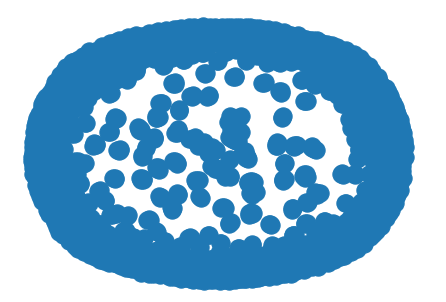

In [125]:
H = nx.Graph()

H.add_nodes_from(n1[0])
H.add_edges_from(n1[1])

nx.draw(H, with_labels=False, font_weight='bold')
plt.show()

And the second network:

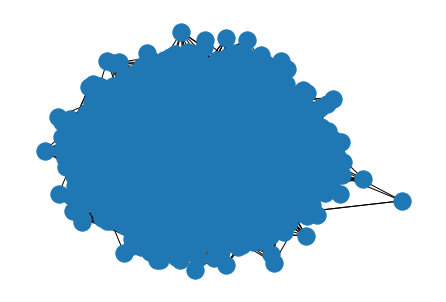

In [126]:
I = nx.Graph()

I.add_nodes_from(n2[0])
I.add_edges_from(n2[1])

nx.draw(I, with_labels=False, font_weight='bold')
plt.show()

Now that we have generated plausible networks, we can save these networks, as per the requested format:

In [142]:
# https://www.w3schools.com/python/python_file_write.asp
# https://docs.python.org/3/library/csv.html

import csv

f = open("random1.txt", "w")
f.write('2000')
f.write('\n')
f.close()

f = open("random2.txt", "w")
f.write('2000')
f.write('\n')
f.close()


with open('random1.txt', 'a', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=' ',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for item in n1[1]:
            spamwriter.writerow(item)


with open('random2.txt', 'a', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=' ',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for item in n2[1]:
            spamwriter.writerow(item)


## 5. Write code for computing the size of the giant component of a given network. Use it to compute the size of giant component of the two random networks you generated (random1.txt and random2.txt), and show the obtained results. Hint: you can use any graph method traversal to compute the giant component, such as breadth-first search (BFS) or depth-first search (DFS). Take care to implement an O(n) algorithm that only passes through each node once.

Our god and saviour StackOverflow provided a **networkx** solution for determining the largest connected component of our generated networks, as well as its size:

In [ ]:
# https://stackoverflow.com/questions/26105764/how-do-i-get-the-giant-component-of-a-networkx-graph
Gcc = sorted(nx.connected_components(H), key=len, reverse=True)
G0 = H.subgraph(Gcc[0])
len(G0)
#G0.nodes

Since this is the target to beat, we can match this solution with the following:

* create a custom filter that, from a tuple, selects an element that differs from a given value;
* create a function *concomp()* that finds all nodes connected to a given node:
    * inizialize the component that will contain the initial node;
    * inizialize unvisited nodes list;
    * find the neighbours of the initial node by matching said node with the edgelist created previously;
    * using the *filtro()* to remove the initial node, which would be redundant at this point, the newfound neighbour is added to the neighbour list, which is then added to the unvisited nodess list.
    * while the unvisited list as length larger than 0, the first element of the unvisited list is added to the component and all new neighbours are found and added to the unvisited list;
    * the first unvisited node is then removed from the list, and the process is repeated, until no new neighbours are found and the unvisited list is exhausted.
    * The function then returns the size of the component that contains the given node as well as the component itself;
* The function is then applied to all nodes of the network, and the sizes found are appended to the list. In order to avoid redundancy, the component itself is attached to a 'visited' list, so nodes already found to belong to a known component are skipped. The implementation of this phase is presented in the answer for the next question.


In [335]:
#https://www.adamsmith.haus/python/answers/how-to-filter-a-list-in-python#use-filter

def filtro(tuple, node):
    if tuple[0] != node:
        return tuple[0]
    else:
        return tuple[1]

def concomp(node, network):
    component = [node]
    unvisited = []
    neighbours = [filtro(lis,node) for lis in network[1] if lis[0] == node or lis[1] == node]
    for item in neighbours:
        unvisited.append(item)

    while len(unvisited) > 0:
        new_neighbours = [filtro(lis, unvisited[0]) for lis in network[1] if (lis[0] == unvisited[0] or lis[1] == unvisited[0]) and (lis[0] not in component and lis[1] not in component)]
        for item in new_neighbours:
            unvisited.append(item)
        component.append(unvisited[0])
        unvisited.remove(unvisited[0])
    return len(component), component


In [336]:
batata = concomp(631,n1) # we know 631 to be part of the largest component thanks to the networkx implementation,
print(batata)

(13, [631, 129, 825, 1851, 782, 86, 1352, 1808, 1680, 1549, 546, 637, 313])


## The following is an exercise to study the emergence of a giant component. Combining your previous code, generate a series of random networks with n = 2000 and p varying from 0.0001 to 0.005 (with steps of 0.0001). Show a plot of your results, with the X axis representing p and the Y axis representing the size of the giant component. Was the plot what you were expecting? What is the shape of it? At what average degree values do you notice something happening?

In order to perform this task, a *profiler()* function was created that incorporates the *erdos()* function that was created previously, extracts the largest component (as detailed previously) and returns its size. We then create a list with all the possible values for *p* and iterate over that list with the *profiler()*. The resulting values are plotted below.

In [ ]:
def profiler(n,p):
    rede = erdos(n,p)
    lengths = []
    visited = []
    for item in range(1,n+1):
        if item in visited:
            pass
        length = concomp(item,rede)
        lengths.append(length[0])
        visited.extend(length[1])
    return np.max(lengths)

The following is an alternative implementation with **networkx** module that was used as a reference, before the function delineated in **5)** was sucessfully created.

In [134]:
'''
def profiler(n,p):
    rede = erdos(n,p)
    rede_nx = nx.Graph()
    rede_nx.add_nodes_from(rede[0])
    rede_nx.add_edges_from(rede[1])
    Gcc = sorted(nx.connected_components(rede_nx), key=len, reverse=True)
    G0 = rede_nx.subgraph(Gcc[0])
    return len(G0)
'''

The custom function to generate the x and y follows:
*Note: this code takes a loooong time to run*

In [ ]:
counter = 0.0001
x_gc = []

while counter <= 0.005:
    x_gc.append(counter)
    counter += 0.0001

y_gc=[]
for item in x_gc:
    y = profiler(2000,item)
    y_gc.append(y)

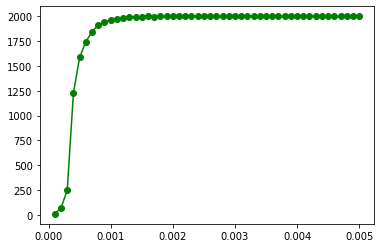

In [138]:
plt.plot(x_gc, y_gc, '-go')

The evolution of the size of the largest connected component in this experiment appears to follow a sigmoidal pattern. For the first 3 values of *p* the largest component was relatively small (less than 1/8 of all available nodes). For $p = 0.0004$ there is a sharp increase in the size of the largest connected component, which possibly signals the emergence of a giant component. At $p = 0.002$ the network is now fully connected, even though it reached this status with a very low slope, with the 10 previous values of *p* already surpassing 1950 nodes.

According to the lectures, a giant component was expected to emerge at around $p = \frac{1}{n-1} = \frac{1}{1999} = 0.0005$. This is consistent with our observation, as at this value well over 70% of the nodes were already connected. The most surprising thing was how early the giant component encompassed the entire network. The expectation for this model is that no isolated nodes be present at $p = 2 * log(n) / (n-1) = 0.007$. In this experiment, the giant component reached 2000 nodes at $p = 0.002$. Since I cannot completely ensure that this work's implementation of the network generator is bulletproof, this discrepancy may be the result of an incorrection in the code used in **erdos()**. Alternatively, this may be just a less likely result of the random number generation inherent to the network creation - random numbers being random.

## 7. Write code for generating a random network following the BAn,m0,m Barab´asi-Albert model). This model uses a preferential attachment mechanism and it works in the following way (some hints):  You begin with a fully connected network containing m0 nodes  In each iteration (until you reach a total n nodes) you add one new node connected to m existing nodes, with a probability proportional to the number of already existing connections of previous nodes. Formally, the probability pi that the new node is connected to node i is: pi = Pki j kj ki is the degree of node i and the sum is made over the degrees of all existing nodes. Include as attached files, two barab´asi-albert networks ba1.txt and ba2.txt generated respectively with n = 2000, m0 = 3, m = 1 and n = 2000, m0 = 5, m = 2 (in the described format).

Based on the notes provided in the question, a function was created that:
* Initializes an empty node list;
* Fills the list with the initial *m0* nodes;
* Initializes the auxiliary list with the verteces pairs for each edge;
* Initializes an empty edge list and fully connects the existing nodes;
* remaining nodes are then added to the network by drawing a connection from the auxiliary list; as described in the notes, preexisting connections increase the probability of selection in this step (preferencial attachment);
* both the new node and the assigned pair are added to the auxiliary list as individual entries and as a tuple to the definitive edge list. Process is repeated *m* times for each new node;


In [7]:
def albert_barabasi(m0, m, n):

    # initial graph:
    node_0 =[]
    for i in range(1,m0+1):
        node_0.append(i)
    edge_0 = node_0 * (m0-1)
    # edge list in pair format for nx and final output
    edgelist = []
    for i in range(1, m0+1):
        for j in range(1, m0+1):
            if i!=j  and tuple(sorted((i,j))) not in edgelist:
                edgelist.append((i,j))

    # add more nodes:
    for i in range(m0,n+1):
        node_0.append(i)
        # add respective edges
        counter = 1
        while counter <= m:
            counter += 1
            new = random.choice(edge_0)
            edge_0.append(new)
            edge_0.append(i)
            # update edgelist:
            edgelist.append((i,new))


    return node_0, edgelist, edge_0

In a similar manner as question **4)**, the networks are then created with our custom function and then stored in a *.txt* file; A preview of the networks with **networkx** is also included, as an illustration of plausibility, since a readable drawing of such a dense and large graph is beyond my skill level.

In [8]:
n3 = albert_barabasi(3,1,2000)
n4 = albert_barabasi(5,2,2000)

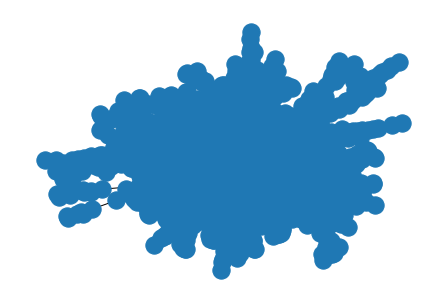

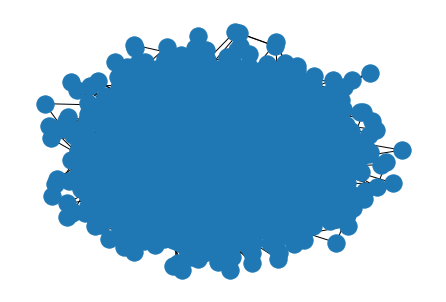

In [12]:
H2 = nx.Graph()

H2.add_nodes_from(n3[0])
H2.add_edges_from(n3[1])

nx.draw(H2, with_labels=False, font_weight='bold')
plt.show()

I2 = nx.Graph()

I2.add_nodes_from(n4[0])
I2.add_edges_from(n4[1])

nx.draw(I2, with_labels=False, font_weight='bold')
plt.show()


In [213]:
import csv

f = open("ba1.txt", "w")
f.write('2000')
f.write('\n')
f.close()

f = open("ba2.txt", "w")
f.write('2000')
f.write('\n')
f.close()


with open('ba1.txt', 'a', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=' ',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for item in n3[1]:
            spamwriter.writerow(item)


with open('ba2.txt', 'a', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=' ',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for item in n4[1]:
            spamwriter.writerow(item)

## 8. The previous process should generate a scale-free network with a power law degree distribution with exponent α = 3. Plot the degree distribution of both your generated networks using cumulative binning (see slides 102 and 103) and try to fit with the corresponding power law function (showing it in the plot).

In order to perform this task, the following issues had to be adressed:
* degree distribution was obtained with **networkx**;
* cumulative degree frequencies (in this case, number of edges with degree equal or larger than degree x) were computed by iterating over the degree frequency list and subtracting the offset value (to account for the equality in 'larger or *equal* degree than x') from the total number of degrees. The resulting values were then stored on a list **y**;
* a linear regression was then performed on log(y) ~ log(degree). The slope of the fitted line, *m*, was used to estimate the degree of the Power Law under the assumption that $-m = \alpha - 1$;
* plots were then drawn, after reversing the logarithmization from the estimates from the fitted model, so they wouldn't incur into double logarithmization.

For both models, the estimates for $\alpha$ ranged from [2.6, 2.7], lower than the theoretical expectation.

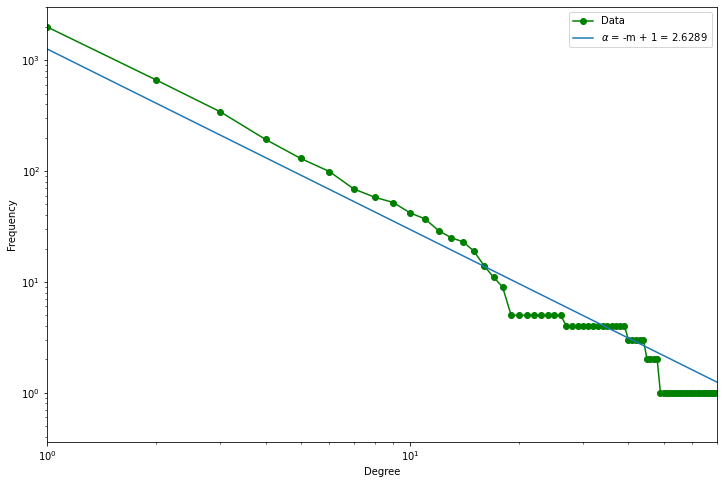

In [114]:
# with help from
# https://www.adamsmith.haus/python/answers/how-to-plot-a-line-of-best-fit-in-python
# https://stackoverflow.com/questions/58302531/combine-f-string-and-raw-string-literal
# http://www.physics.pomona.edu/sixideas/old/labs/LRM/LR05.pdf
# https://www.dcc.fc.up.pt/~pribeiro/aulas/ns2122/2_graphmodels.pdf
# https://barabasi.com/f/622.pdf

degree_freq = nx.degree_histogram(H2)
degrees = range(1, len(degree_freq))
y = []
for i in range(1,len(degree_freq)):
    new_value = np.sum(degree_freq) - (np.cumsum(degree_freq))[i-1]
    y.append(new_value)

model = LinearRegression()
model.fit(np.array(np.log(degrees)).reshape(-1,1), np.log(y))

plt.figure(figsize=(12, 8))
plt.loglog(degrees, y,'go-', label = 'Data')
plt.loglog(degrees,  np.exp(model.coef_*np.log(degrees) + model.intercept_), label = fr'$\alpha$ = -m + 1 = {np.round(-model.coef_,4).item()+1}')
plt.xlim([1,70])
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend(loc='upper right')


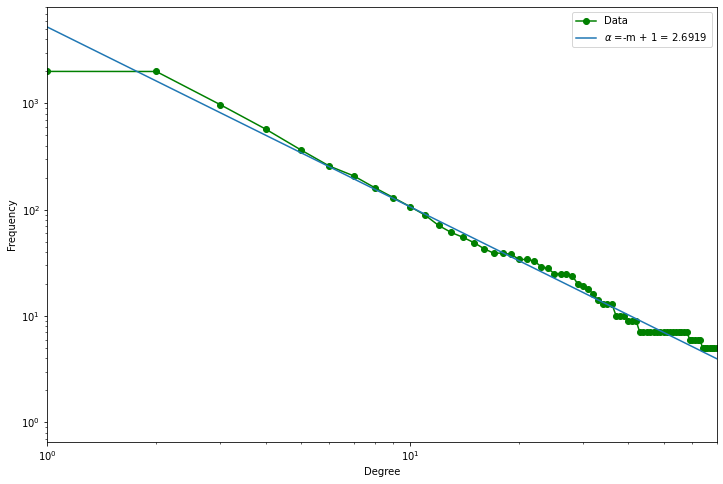

In [115]:
# with help from
# https://www.adamsmith.haus/python/answers/how-to-plot-a-line-of-best-fit-in-python
# https://stackoverflow.com/questions/58302531/combine-f-string-and-raw-string-literal
# http://www.physics.pomona.edu/sixideas/old/labs/LRM/LR05.pdf
# https://www.dcc.fc.up.pt/~pribeiro/aulas/ns2122/2_graphmodels.pdf
# https://digitalcommons.usu.edu/cgi/viewcontent.cgi?article=1360&context=biology_facpub

degree_freq = nx.degree_histogram(I2)
degrees = range(1, len(degree_freq))
y = []
for i in range(1,len(degree_freq)):
    new_value = np.sum(degree_freq) - (np.cumsum(degree_freq))[i-1]
    y.append(new_value)

model = LinearRegression()
model.fit(np.array(np.log(degrees)).reshape(-1,1), np.log(y))

plt.figure(figsize=(12, 8))
plt.loglog(degrees, y,'go-', label = 'Data')
plt.loglog(degrees,  np.exp(model.coef_*np.log(degrees) + model.intercept_), label = fr'$\alpha$ =-m + 1 = {np.round(-model.coef_,4).item()+1}')
plt.xlim([1,70])
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
